# Doctor's Consultation Fees Prediction

Problem Statement:

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

# FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Loading the Train dataset
df_train=pd.read_excel('Fee_Train.xlsx')
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
## Loading the test dataset
df_test=pd.read_excel('Fee_Test.xlsx')
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
## Checking the shape of train dataset
print('Shape of train dataset',df_train.shape)

##Checking shape of test Dataset
print('shape of test dataset',df_test.shape)

Shape of train dataset (5961, 7)
shape of test dataset (1987, 6)


We could see our train dataset has 5961 rows and 7 attributes including Our target Attribute.

Fees is our target attribute which we need to predict with the help of test dataset which has 1987 rows and 6 columns.

In [5]:
## Checking data Types
print('Training Dataset \n',df_train.dtypes)


print('Test Dataset \n',df_test.dtypes)

Training Dataset 
 Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object
Test Dataset 
 Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object


We have all 6 attributes of Object data type and our Target attribute is numeric.

This is a regression Problem statement. All attribute's data type is ok.

In [6]:
#Checking Missing values
print('Missing values in Train Dataset \n',df_train.isnull().sum())

print('Missing values in Test dataset \n',df_test.isnull().sum())

Missing values in Train Dataset 
 Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64
Missing values in Test dataset 
 Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [7]:
# Let's check the mode of the Rating and Place.

rating_mode = df_train['Rating'].mode()
print("Mode of Rating of Train Data:", rating_mode)

Mode of Rating of Train Data: 0    100%
dtype: object


In [8]:
#Replacing the null values with the mode of the respective column.

# Train data
df_train.Rating = df_train.Rating.fillna('100%')
df_train.Place = df_train.Place.fillna('Not_Known')

# Test data
df_test.Rating = df_train.Rating.fillna('100%')
df_test.Place = df_train.Place.fillna('Not_Known')

In [9]:
# Dropping the Miscellaneous_Info because the info. this column is reflecting does not affects the consulatation fees of the doctor.

df_train.drop(['Miscellaneous_Info'], axis=1, inplace = True)
df_test.drop(['Miscellaneous_Info'], axis=1, inplace = True)

<AxesSubplot:>

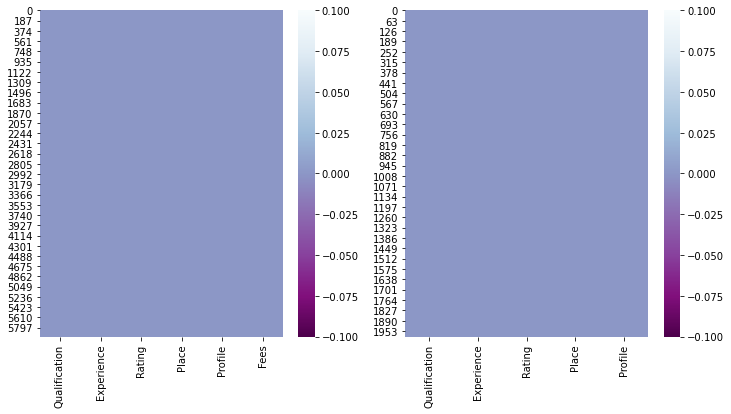

In [10]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.heatmap(df_train.isnull(), cmap = 'BuPu_r')

plt.subplot(1,2,2)
sns.heatmap(df_test.isnull(), cmap = 'BuPu_r')

We have sucessfully fillup the missing values.

# Data Cleaning

In [11]:
# Let's check the string data from the train dataset.

df_obj = df_train.select_dtypes(include='object')
df_obj.head()

,Qualification,Experience,Rating,Place,Profile
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda


In [12]:
# Let's check  the value counts of each categorical feature.

for i in df_obj.columns:
    x = df_obj[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Qualification --------
 BDS                                                                                                                           488
BHMS                                                                                                                          477
BAMS                                                                                                                          471
MBBS                                                                                                                          334
MBBS, MS - ENT                                                                                                                220
                                                                                                                             ... 
MBBS, MD - General Medicine, FRCP, D.Sc, FACP, FRCP, FRCP                                                                       1
MD - Anatomy, MBBS                                       

In [18]:
#Let's check  the value counts of test data.
df_test=df_test.select_dtypes(include='object')
for i in df_test.columns:
    x = df_test[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Qualification --------
 BAMS                                                                                                                                 153
BHMS                                                                                                                                 150
BDS                                                                                                                                  144
MBBS                                                                                                                                 107
MBBS, MD - Dermatology                                                                                                                64
                                                                                                                                    ... 
MBBS, MS - ENT, DNB                                                                                                                    1
MBBS, MS

In [20]:
# Stripping off or removing the 'years experience' from the 'Experience' e.g. 6 votes stripped off to 6, for training and testing dataset.

df_train["Experience"]=df_train["Experience"].str.rstrip('years experience')
df_test["Experience"]=df_test["Experience"].str.rstrip('years experience')

# '%' from "Rating"
df_train["Rating"]=df_train["Rating"].str.rstrip('%')
df_test["Rating"]=df_test["Rating"].str.rstrip('%')

In [21]:
# splitting the Place into two diff columns, They are delimited by ','


# For train dataset.
df_train['Area']=df_train.Place.str.split(',').str[0]
df_train['City']=df_train.Place.str.split(',').str[1]

# For test dataset.
df_test['Area']=df_test.Place.str.split(',').str[0]
df_test['City']=df_test.Place.str.split(',').str[1]

In [23]:
# Let's check teh mode of City in train and test data.

print("Mode of City in train dataset :",df_train['City'].mode(), '\n')
print("Mode of City in test dataset :",df_test['City'].mode(), '\n')

Mode of City in train dataset : 0     Bangalore
dtype: object 

Mode of City in test dataset : 0     Delhi
dtype: object 



In [24]:
# Filling the NaN values in City

df_train['City'].fillna('Unknown', inplace= True)
df_test['City'].fillna('Unknown', inplace= True)

In [25]:
indexName = df_train[df_train['City']=='Sector 5'].index

In [26]:
df_train.drop(indexName, inplace=True)

In [27]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Area,City
0,MBBS,35,100,"Kakkanad, Ernakulam",General Medicine,Kakkanad,Ernakulam
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,98,"Whitefield, Bangalore",ENT Specialist,Whitefield,Bangalore
2,"MBBS, DDVL",40,100,"Mathikere - BEL, Bangalore",Dermatologists,Mathikere - BEL,Bangalore
3,BAMS,0,100,"Bannerghatta Road, Bangalore",Ayurveda,Bannerghatta Road,Bangalore
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Keelkattalai, Chennai",Dentist,Keelkattalai,Chennai


In [28]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai


So, the the 2 columns are shown in both the dataset as Area and City after extraction or splitting from Place.

CONVERTING INTO NUMERIC FORM

As, except 'Fees' , rest all coulmns are of object type, So needs to be converted into numeric form.

This is done by just converting dtype using 'astype()', replacing values and labelencoding.

In [29]:
# Converting the data type of 'Experience' for both train and test dataset from object to float respectively.

df_train["Experience"]=df_train["Experience"].astype('int64')
df_test["Experience"]=df_test["Experience"].astype('int64')

In [30]:
# Converting the data type of 'Rating' for both train and test dataset from object to float respectively.

df_train["Rating"]=df_train["Rating"].astype('int64')
df_test["Rating"]=df_test["Rating"].astype('int64')

In [31]:
# Converting the 'Profile' into numeric by creating dummies for train data.

Profile = df_train[['Profile']]
Profile = pd.get_dummies(Profile, drop_first = True)
Profile.head(3)

,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0


In [32]:
# Converting the 'Profile' into numeric by creating dummies for test data.
Profile = df_test[['Profile']]
Profile = pd.get_dummies(Profile, drop_first = True)
Profile.head(3)

,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0


In [34]:
# Converting the 'City' into numeric by creating dummies for train data.
City = df_train[['City']]
City = pd.get_dummies(City, drop_first = True)
City.head(3)

,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram,City_Unknown
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0


In [35]:
# Converting the 'City' into numeric by creating dummies for test data.
City = df_test[['City']]
City = pd.get_dummies(City, drop_first = True)
City.head(3)

,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0


In [36]:
# Using the LabelEncoder in order to convert the Area into numerical for train data.

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df_train['Area'] = pd.DataFrame(lb.fit_transform(df_train['Area']))
df_train['Qualification'] = pd.DataFrame(lb.fit_transform(df_train['Qualification']))

In [37]:
# converting the Area into numerical for test data.

lb=LabelEncoder()
df_test['Area'] = pd.DataFrame(lb.fit_transform(df_test['Area']))
df_test['Qualification'] = pd.DataFrame(lb.fit_transform(df_test['Qualification']))

In [38]:
# Let's now concat the dummie variables with numerical data and the columns whose dtypes has been changed and making a dataset with all valus being numerical in nature.

# For train dataset.

df_train = pd.concat([df_train, Profile, City], axis = 1)
df_train.head(2)

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City,Profile_Dentist,Profile_Dermatologists,...,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,401,24,100,"Kakkanad, Ernakulam",Homeopath,100,296,Ernakulam,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,73,12,98,"Whitefield, Bangalore",Ayurveda,350,856,Bangalore,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Let's now concat the dummie variables with numerical data and the columns whose dtypes has been changed and making a dataset with all valus being numerical in nature.

# For test dataset.

df_test = pd.concat([df_test, Profile, City], axis = 1)
df_test.head(2)

,Qualification,Experience,Rating,Place,Profile,Area,City,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,241,35,100,"Kakkanad, Ernakulam",General Medicine,210,Ernakulam,0,0,0,1,0,0,0,0,1,0,0,0,0
1,340,31,98,"Whitefield, Bangalore",ENT Specialist,588,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
# Dropping columns for both train and test dataset.

df_train.drop(['Place','City','Profile'], axis=1, inplace = True)
df_test.drop(['Place', 'City', 'Profile'], axis=1, inplace = True)

In [41]:
# Let's check the final train dataset.
df_train.head(4)

,Qualification,Experience,Rating,Fees,Area,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,401,24,100,100,296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,73,12,98,350,856,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1135,9,100,300,452,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,12,100,250,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Let's check the final test dataset.

df_test.head(4)

,Qualification,Experience,Rating,Area,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,241,35,100,210,0,0,0,1,0,0,0,0,1,0,0,0,0
1,340,31,98,588,0,0,1,0,0,0,0,0,0,0,0,0,0
2,258,40,100,310,0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,0,100,53,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Let's check the shape of final train and test dataset.

print("Shape of Train data :", df_train.shape)
print("Shape of Test data :",df_test.shape)

Shape of Train data : (5961, 18)
Shape of Test data : (1987, 17)


In [44]:
# Let's check the data type of final train and test dataset.

print("-----FINAL TRAIN DATASET-----\n", df_train.dtypes,'\n')
print("-----FINAL TEST DATASET-----\n", df_test.dtypes)

-----FINAL TRAIN DATASET-----
 Qualification                 int32
Experience                    int64
Rating                        int64
Fees                          int64
Area                          int32
Profile_Dentist             float64
Profile_Dermatologists      float64
Profile_ENT Specialist      float64
Profile_General Medicine    float64
Profile_Homeopath           float64
City_ Chennai               float64
City_ Coimbatore            float64
City_ Delhi                 float64
City_ Ernakulam             float64
City_ Hyderabad             float64
City_ Mumbai                float64
City_ Thiruvananthapuram    float64
City_Unknown                float64
dtype: object 

-----FINAL TEST DATASET-----
 Qualification               int32
Experience                  int64
Rating                      int64
Area                        int32
Profile_Dentist             uint8
Profile_Dermatologists      uint8
Profile_ENT Specialist      uint8
Profile_General Medicine    uint8
Pro

The final train and test dataset contains 5961 columns and 27 rows & 1987 columns and 26 row respectively having all the values in numeric form

# Statistical Summary

In [45]:
# Let's use the describe function to check the statistical summary of the train dataset.

df_train.describe()

,Qualification,Experience,Rating,Fees,Area,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,596.857574,17.303976,97.610636,307.944640,411.772857,0.221943,0.170609,0.118269,0.223452,0.139406,0.145949,0.039255,0.204328,0.026170,0.160544,0.201812,0.015098,0.004026
std,413.842446,11.142798,5.881539,190.920373,255.423921,0.415657,0.376262,0.323007,0.416664,0.346457,0.353144,0.194250,0.403311,0.159681,0.367202,0.401453,0.121974,0.063340
min,0.000000,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,9.000000,98.000000,150.000000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,14.000000,100.000000,300.000000,409.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,943.000000,23.000000,100.000000,500.000000,623.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1419.000000,66.000000,100.000000,950.000000,866.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# statistical summary of the test dataset.
df_test.describe()

,Qualification,Experience,Rating,Area,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,17.874685,97.623050,286.676397,0.221943,0.170609,0.118269,0.223452,0.139406,0.145949,0.039255,0.204328,0.026170,0.160544,0.201812,0.015098,0.004026
std,185.961177,11.366764,6.053582,175.231105,0.415657,0.376262,0.323007,0.416664,0.346457,0.353144,0.194250,0.403311,0.159681,0.367202,0.401453,0.121974,0.063340
min,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,9.000000,98.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,241.000000,15.000000,100.000000,285.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,417.000000,24.000000,100.000000,434.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,629.000000,65.000000,100.000000,596.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_train.isnull().sum()

Qualification               0
Experience                  0
Rating                      0
Fees                        0
Area                        0
Profile_Dentist             0
Profile_Dermatologists      0
Profile_ENT Specialist      0
Profile_General Medicine    0
Profile_Homeopath           0
City_ Chennai               0
City_ Coimbatore            0
City_ Delhi                 0
City_ Ernakulam             0
City_ Hyderabad             0
City_ Mumbai                0
City_ Thiruvananthapuram    0
City_Unknown                0
dtype: int64

In [47]:
# FIlling the Missing Values.
 
# Now let's fill the null values present in 'LoanAmount' with it's median value and 'Loan_Amount_Term' with it's mean.

df_train['Profile_Dentist'].replace(np.NaN,df_train['Profile_Dentist'].mean(),inplace=True)
df_train['Profile_Dermatologists'].replace(np.NaN,df_train['Profile_Dermatologists'].mean(),inplace=True)
df_train['Profile_ENT Specialist'].replace(np.NaN,df_train['Profile_ENT Specialist'].mean(),inplace=True)
df_train['Profile_General Medicine'].replace(np.NaN,df_train['Profile_General Medicine'].mean(),inplace=True)
df_train['Profile_Homeopath'].replace(np.NaN,df_train['Profile_Homeopath'].mean(),inplace=True)
df_train['City_ Chennai'].replace(np.NaN,df_train['City_ Chennai'].mean(),inplace=True)
df_train['City_ Coimbatore'].replace(np.NaN,df_train['City_ Coimbatore'].mean(),inplace=True)
df_train['City_ Delhi'].replace(np.NaN,df_train['City_ Delhi'].mean(),inplace=True)
df_train['City_ Ernakulam'].replace(np.NaN,df_train['City_ Ernakulam'].mean(),inplace=True)
df_train['City_ Hyderabad'].replace(np.NaN,df_train['City_ Hyderabad'].mean(),inplace=True)
df_train['City_ Mumbai'].replace(np.NaN,df_train['City_ Mumbai'].mean(),inplace=True)
df_train['City_ Thiruvananthapuram'].replace(np.NaN,df_train['City_ Thiruvananthapuram'].mean(),inplace=True)
df_train['City_Unknown'].replace(np.NaN,df_train['City_Unknown'].mean(),inplace=True)

# Removing outliers and skewness

In [49]:
# Let's check the skewness of the data before removing the outliers.
df_train.skew()

Qualification                0.239720
Experience                   0.991089
Rating                      -4.701646
Fees                         0.751870
Area                         0.109516
Profile_Dentist              2.318506
Profile_Dermatologists       3.034109
Profile_ENT Specialist       4.095949
Profile_General Medicine     2.300346
Profile_Homeopath            3.607266
City_ Chennai                3.474754
City_ Coimbatore             8.220685
City_ Delhi                  2.540849
City_ Ernakulam             10.284380
City_ Hyderabad              3.203971
City_ Mumbai                 2.574332
City_ Thiruvananthapuram    13.778299
City_Unknown                27.138677
dtype: float64

In [50]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_train))
print(z.shape)

# Removing the outliers.

df_train = df_train.loc[(z<3).all(axis=1)]
print(df_train.shape)

(5961, 18)
(3896, 18)


By comparing shape of 'z' and 'doc_train' shape , 2065 rows have been removed as an outlier

In [51]:
# Again checking the skewness after treament.

df_train.skew()

Qualification               0.258902
Experience                  0.944773
Rating                     -2.592202
Fees                        0.709793
Area                        0.119128
Profile_Dentist            -8.751109
Profile_Dermatologists     -8.751109
Profile_ENT Specialist     -8.751109
Profile_General Medicine   -8.751109
Profile_Homeopath          -8.751109
City_ Chennai              -8.751109
City_ Coimbatore           -8.751109
City_ Delhi                -8.751109
City_ Ernakulam            -8.751109
City_ Hyderabad            -8.751109
City_ Mumbai               -8.751109
City_ Thiruvananthapuram   -8.751109
City_Unknown               -8.751109
dtype: float64

In [52]:
# Let's check the skewness of the data before removing the outliers.
df_test.skew()

Qualification                0.280822
Experience                   0.963447
Rating                      -4.598549
Area                         0.094963
Profile_Dentist              1.339264
Profile_Dermatologists       1.752626
Profile_ENT Specialist       2.365989
Profile_General Medicine     1.328775
Profile_Homeopath            2.083705
City_ Chennai                2.007161
City_ Coimbatore             4.748606
City_ Delhi                  1.467699
City_ Ernakulam              5.940681
City_ Hyderabad              1.850745
City_ Mumbai                 1.487040
City_ Thiruvananthapuram     7.958912
City_Unknown                15.676416
dtype: float64

In [53]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_test))
print(z.shape)

# Removing the outliers.

df_test = df_test.loc[(z<3).all(axis=1)]
print(df_test.shape)

(1987, 17)
(1758, 17)


By comparing shape of 'z' and 'doc_test' shape , 229 rows have been removed as an outlier

In [55]:
# Treating the skewness with sqrt function.
for col in df_test.columns:
    if df_test.skew().loc[col]>0.55:
        df_test[col]=np.sqrt(df_test[col])

In [56]:
# Again checking the skewness after treament.
df_test.skew()

Qualification               0.275477
Experience                 -0.012364
Rating                     -2.823409
Area                        0.148629
Profile_Dentist             1.328125
Profile_Dermatologists      1.751953
Profile_ENT Specialist      2.365234
Profile_General Medicine    1.347656
Profile_Homeopath           2.091797
City_ Chennai               1.840820
City_ Coimbatore            0.000000
City_ Delhi                 1.328125
City_ Ernakulam             0.000000
City_ Hyderabad             1.742188
City_ Mumbai                1.328125
City_ Thiruvananthapuram    0.000000
City_Unknown                0.000000
dtype: float64

The cleaning of the data is done. So now, let's move further and do the testing and training of data by splitting the target and rest variables and selecting the best model through various algorithms and evaluation can be done.

# Separating the input and output variables

In [57]:
# Let's Separating the input and target variables

X = df_train.drop(columns=["Fees"])
y = df_train[["Fees"]]

In [59]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(3896, 17)
(3896, 1)


In [60]:
# Let's check the head of the input variables.
X.head()

,Qualification,Experience,Rating,Area,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
3,464,12,100,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,43,31,100,622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,134,18,92,864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,497,27,100,249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,204,25,95,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Let's check the head of the output variables.
y.head()

,Fees
3,250
42,500
149,400
192,500
235,200


# Standard Scaling 

In [62]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-3.13139853e-01, -4.46448581e-01,  4.95364552e-01, ...,
        -8.86059840e+00, -8.86059840e+00, -8.86059840e+00],
       [-1.32041173e+00,  1.33761046e+00,  4.95364552e-01, ...,
        -8.86059840e+00, -8.86059840e+00, -8.86059840e+00],
       [-1.10268788e+00,  1.16938486e-01, -1.74777396e+00, ...,
        -8.86059840e+00, -8.86059840e+00, -8.86059840e+00],
       ...,
       [ 2.67935882e-03,  2.27658891e+00, -3.45812389e-01, ...,
         1.12859195e-01,  1.12859195e-01,  1.12859195e-01],
       [ 8.32901074e-01, -1.64755047e-01, -2.30855858e+00, ...,
         1.12859195e-01,  1.12859195e-01,  1.12859195e-01],
       [-8.41897775e-01,  2.30406415e-02,  4.95364552e-01, ...,
         1.12859195e-01,  1.12859195e-01,  1.12859195e-01]])

# Training And Testing the Models

In [63]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [64]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print ("Train acc",reg.score(X_train,y_train))
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [65]:
# Creating the instances for the algorithms.

lr = LinearRegression()
lreg = Lasso(alpha=0.0001)
rg = Ridge(alpha=1)
sv = SVR()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()

In [66]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [67]:

# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.10583982454037932 achieved at 64


Train acc 0.08530447631594462


Mean Absolute Error :  12.066940158056292


RMSE :  175.07343645267392


Cross validation score (Mean r2 score): 0.08029069717431259
Standard Deviationin r2 score : 0.01214598149675559




-------- Lasso --------
Maximum r2 score : 0.10583977244687315 achieved at 64


Train acc 0.08553026841952793


Mean Absolute Error :  12.060525185877982


RMSE :  174.97308016307585


Cross validation score (Mean r2 score): 0.08072909701955797
Standard Deviationin r2 score : 0.011522234524945994




-------- Ridge --------
Maximum r2 score : 0.10583221461920789 achieved at 64


Train acc 0.08553026066404945


Mean Absolute Error :  12.060567799763689


RMSE :  174.97286669041245


Cross validation score (Mean r2 score): 0.08072944686300754
Standard Deviationin r2 score : 0.011520236432498818




-------- SVR --------
Maximum r2 score : 0.0647847379338331 achieved at 54


Train a

TEST DATA

In [69]:
X_train = df_train.drop(labels='Fees', axis=1)
y_train = df_train['Fees'].values
X_test = df_test

In [70]:
# As gradientbooster regression is giving good results out of the algorithms tested.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 94, test_size = 0.20)
GBC = GradientBoostingRegressor()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [71]:
# Evaluating the r2 score and RMSE from the selcted model.

print("r2 score is : ",r2_score(y_test, y_pred))
print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is :  0.20646040416407352
Mean Absolute Error :  11.42818616469487
RMSE :  162.56345382644167


In [73]:
# saving the model using joblib
import joblib

# Save the model as a pickle in a file
joblib.dump(GBC, 'doc_fees.pkl')

['doc_fees.pkl']